# Multi-phone localization

## Sound source distance
Let the location of hydrophone $i$ be $h_i = (x_i,y_i.z_i)$ and the source location be $s=(s_x,s_y,s_z)$ then the distance of the source from the hydrophone is related by

\begin{equation} \tag{*}
R_i^2=(s_x-x_i)^2+(s_y-y_i)^2+(s_z-z_i)^2
\end{equation}
which becomes

\begin{equation} \tag{*}
R_i^2=(s_x^2+s_y^2+s_z^2)+(x_i^2+y_i^2+z_i^2) -2s_x x_i -2s_y y_i -2s_z z_i
\end{equation}
or in short

\begin{equation}
R_i^2=|s|^2+|h_i|^2-2h_i^Ts
\end{equation}

Having more then 1 hydrophone, then for any pair of hydrophones $(h_i, h_j)$ one can form the difference obtaining

\begin{equation}
R_i^2-R_j^2=|h_i|^2-|h_j|^2-2(h_i-h_j)^Ts
\end{equation}

Noting that $R_i^2-R_j^2=(R_j+(\delta R_{ij}))^2-R_j^2 = 2(\delta R_{ij})R_j+(\delta R_{ij})^2 $ 

one gets the linear equation

\begin{equation}
2(\delta R_{ij})R_j+(\delta R_{ij})^2=|h_i|^2-|h_j|^2-2(h_i-h_j)^Ts
\end{equation}
or, by putting the unknown source location to the left side and dividing by 2

\begin{equation}
(h_i-h_j)^Ts=\frac{|h_i|^2-|h_j|^2-(\delta R_{ij})^2}{2}-(\delta R_{ij})R_j
\end{equation}



### System of equations
Let the number of hydrophones be $n+1$ then one gets $n$ equations

\begin{equation}
\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\\vdots&\vdots&\vdots\\(x_n-x_0)&(y_n-y_0)&(z_n-z_0)\end{matrix}\right)s
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\\vdots\\|h_n|^2-|h_0|^2-(\delta R_{n0})^2\end{matrix}\right)
-\left(\begin{matrix}\delta R_{10}\\\vdots\\\delta R_{n0}\end{matrix}\right)R_0
\end{equation}

or in matrix notation

\begin{equation}
As=b_0-b_1R_0
\end{equation}
whereby

\begin{equation}
A=\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\\vdots&\vdots&\vdots\\(x_n-x_0)&(y_n-y_0)&(z_n-z_0)\end{matrix}\right)
\end{equation}

\begin{equation}
b_0=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\\vdots\\|h_n|^2-|h_0|^2-(\delta R_{n0})^2\end{matrix}\right)
\end{equation}

\begin{equation}
b_1=\left(\begin{matrix}\delta R_{10}\\\vdots\\\delta R_{n0}\end{matrix}\right)
\end{equation}


### Pseudo inverse
A system of equations for three unknows $s=(s_x,s_y,s_z)$ cannot be solved without additional constraints if the number of independent equations is different of three. The additional constraint, whicht is typically assumed is that the vector norm $||s|| \to \min$ that leads to the (Penrose) pseudo inverse $A^+$

Definintion of pseudo inverse $A^+$

\begin{equation}
    A A^+ A = A
\end{equation}

For an underdetermined system, i.e. number of equation < number of unknows, or rank of matrix $A$ < numbers of unknown, the pseudo inverse is given by

\begin{equation}
    A^+ = A^T(AA^T)^{-1}
\end{equation}

For an overdetermined system, i.e. number of equation > number of unknows, or rank of matrix $A$ < numbers of equations, the pseudo inverse is given by

\begin{equation}
    A^+ = (A^TA)^{-1}A^T
\end{equation}
which is the classical least mean square (LMS) fit

### Source location and range estimation
With

\begin{align}
u_0 =& A^+ b_0\\
u_1 =& A^+ b_1
\end{align}
the source vector becomes

\begin{equation}
s=u_0-u_1R_0
\end{equation}
Knowing that

\begin{equation}
R_0^2=|s-h_0|^2=|u_0-h_0-u_1R_0|^2
\end{equation}
or

\begin{equation}
R_0^2=|u_0-h_0|^2-2(u_0-h_0)^Tu_1R_0 + |u_1|^2R_0^2
\end{equation}
one obtains a quadratic equation in $R_0$

\begin{equation}
(|u_1|^2-1)R_0^2 -2(u_0-h_0)^Tu_1R_0 +|u_0-h_0|^2=0
\end{equation}

#### Quadratic equation
For a quadratic equation

\begin{equation}
ax^2+bx+c=0
\end{equation}

the solution is known to be

\begin{equation}
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
\end{equation}

To apply the solution of a quadratic equation one defines

\begin{equation}
a=(|u_1|^2-1)
\end{equation}

\begin{equation}
b=-2(u_0-h_0)^Tu_1
\end{equation}

\begin{equation}
c=|u_0-h_0|^2
\end{equation}



## Localization with five or more hydrophones
Five or more hydrophones allow at least 4 hydrophone pairs that in matrix notation are written as

### method 1
Let the number of hydrophones be $n+1$ then one gets $n$ equations

\begin{equation}
\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\\vdots&\vdots&\vdots\\(x_n-x_0)&(y_n-y_0)&(z_n-z_0)\end{matrix}\right)s
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\\vdots\\|h_n|^2-|h_0|^2-(\delta R_{n0})^2\end{matrix}\right)
-\left(\begin{matrix}\delta R_{10}\\\vdots\\\delta R_{n0}\end{matrix}\right)R_0
\end{equation}

that again transforms to a vector 

\begin{equation}
s=u_0 - u_1R_0
\end{equation}
with

\begin{align}
u_0=&A^+b_0\\
u_1=&A^+b_1
\end{align}


z: [[-0.9614814  -0.06958701  0.93023403]]
u1: [[ 0.08777084  0.0063524  -0.08491836]]
az: [-175.86044785] el: [43.9788835]
azo: -175.8604478533724 elo: 43.97888350072386
S: [ 4. 10.  2.] r0: 10.95445115010333


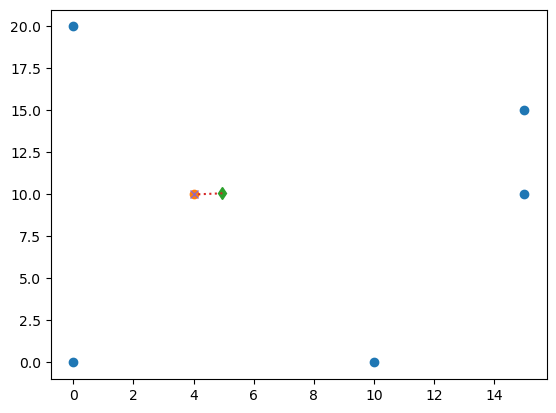

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# five hydrophones
# method 1
h=np.array([[0,0,0],[10,0,0],[0,20,0],[15,15,5],[15,10,5]])
D=h[1:,:]-h[0,:].reshape(1,-1)
DI=np.linalg.pinv(D)

#simulasted whale location
w=np.array([4,10,2])

# whale directions from hydrophone
D=w-h
# slant ranges
R=np.sqrt(np.sum(D**2,1))

# for selecting hydrophone pairs
im1=[1,2,3,4]
im0=[0,0,0,0]
#
# simulated path differences
DR=R[im1]-R[im0]

def direction(DI,h,im1,im0,DR):
    # estimation method 1
    b0=1/2*(np.sum(h[im1,:]**2,1) - np.sum(h[im0,:]**2,1)-(DR**2))
    b1=DR

    u0=(DI@b0).reshape(-1,1)
    u1=(DI@b1).reshape(-1,1)

    # direction estimation
    az=np.arctan2(-u1[1],-u1[0])*180/np.pi
    el=np.arctan2(-u1[2],np.sqrt(u1[0]**2+u1[1]**2))*180/np.pi

    return u0,u1,az,el

u0,u1,az,el=direction(DI,h,im1,im0,DR)
# check with simulation
z=w-u0.T
z1=z/np.sqrt(np.sum(z**2))
azo=np.arctan2(z1[0,1],z1[0,0])*180/np.pi
elo=np.arctan2(z1[0,2],np.sqrt(z1[0,0]**2+z1[0,1]**2))*180/np.pi
print('z:',z)
print('u1:',u1.T)
print('az:',az, 'el:',el)
print('azo:',azo,'elo:',elo)

# range estimation
def rangeEstimation(u0,u1,h):
    h0=h.reshape(-1,1)
    aa=np.sum(u1**2)-1
    bb=-np.sum((u0-h0)*u1)
    cc=np.sum((u0-h0)**2)
    r0=(-bb-np.sqrt(bb*bb-aa*cc))/(aa)
    S=(u0-u1*r0)[:,0]
    return S,r0

S,r0=rangeEstimation(u0,u1,h[0,:])
print('S:',S,'r0:',r0)

# to visualize direction
rr=np.arange(0,10,0.01)
vv=u0-u1*rr

if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(u0[0],u0[1],'d')
    plt.plot(vv[0,:],vv[1,:],':')
    plt.plot(S[0],S[1],'x')
    plt.show()


### method 2
Let the number of hydrophones be again $n+1$ then one gets $n$ equations

\begin{equation}
\left(\begin{matrix}\delta R_{10}&(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\\vdots&\vdots&\vdots&\vdots\\\delta R_{n0}&(x_n-x_0)&(y_n-y_0)&(z_n-z_0)\end{matrix}\right)\left(\begin{matrix}R_0\\s_y\\s_y\\s_z\end{matrix}\right)
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\\vdots\\|h_n|^2-|h_0|^2-(\delta R_{n0})^2\end{matrix}\right)
\end{equation}
The solution of which using the LMS pseudo inverse gives directly the source co-ordinates and the source range from the reference hydrophone

w: [ 4 10  2] S: [ 4. 10.  2.]
R[0]: 10.954451150103322 r0: 10.954451150103374


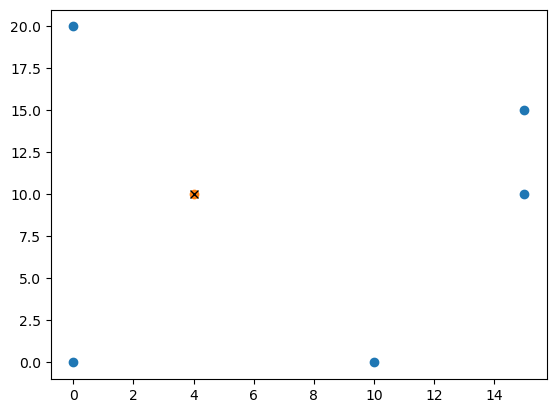

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# five hydrophones
# method 2
h=np.array([[0,0,0],[10,0,0],[0,20,0],[15,15,5],[15,10,5]])

#simulasted whale location
w=np.array([4,10,2])

# whale directions from hydrophones
RX=w-h
# slant ranges
R=np.sqrt(np.sum(RX**2,1))

# for selecting hydrophone pairs
im1=[1,2,3,4]
im0=[0,0,0,0]
#
# simulated path differences
DR=R[im1]-R[im0]

# estimation method 2
def localization(h,im1,im0,DR):
        
    b0=1/2*(np.sum(h[im1,:]**2,1) - np.sum(h[im0,:]**2,1)-(DR**2))
    b1=DR

    D=h[im1,:]-h[im0,:]
    A=np.append(b1.reshape(-1,1),D,1)
    AI=np.linalg.pinv(A)

    u0=AI@b0
    r0=u0[0]
    S=u0[1:]

    return S,r0

S,r0=localization(h,im1,im0,DR)

# check with simulation
print('w:',w,'S:',S)
print('R[0]:',R[0],'r0:',r0)

if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(S[0],S[1],'kx')
    plt.show()


## Four-hydrophone localization

Four hydrophones allow 3 hydrophone pairs that in matrix notation are written as

\begin{equation}
\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\(x_2-x_0)&(y_2-y_0)&(z_2-z_0)\\(x_3-x_0)&(y_3-y_0)&(z_3-z_0)\end{matrix}\right)s
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\|h_2|^2-|h_0|^2-(\delta R_{20})^2\\|h_3|^2-|h_0|^2-(\delta R_{30})^2\end{matrix}\right)
-\left(\begin{matrix}\delta R_{10}\\\delta R_{20}\\\delta R_{30}\end{matrix}\right)R_0
\end{equation}
or equivalently

\begin{equation}
s=u_0-u_1R_0
\end{equation}
and the solution is obtained via the quadratic equation in $R_0$


z: [[-0.9614814  0.        -0.3919192]]
u1: [[8.77708416e-02 1.91364755e-17 3.57771647e-02]]
az: [-180.] el: [-22.17679975]
azo: 180.0 elo: -22.176799751820553
S: [ 4. 10.  2.] r0: 10.954451150103324


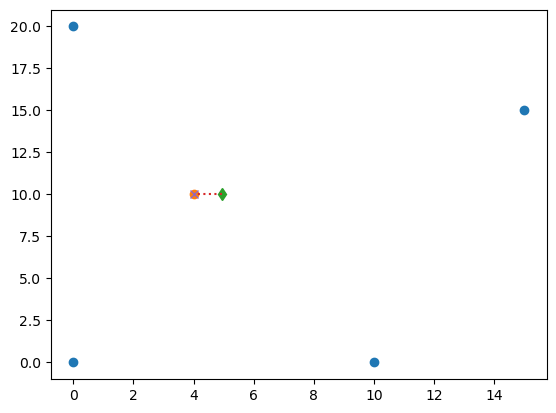

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# four hydrophones
h=np.array([[0,0,0],[10,0,0],[0,20,0],[15,15,5]])
D=h[1:,:]-h[0,:].reshape(1,-1)
DI=np.linalg.pinv(D)

#simulasted whale location above hydrophone plane
w=np.array([4,10,2])

# whale directions from hydrophone
D=w-h
# slant ranges
R=np.sqrt(np.sum(D**2,1))

# for selecting hydrophone pairs
im1=[1,2,3]
im0=[0,0,0]
#
# simulated path differences
DR=R[im1]-R[im0]

u0,u1,az,el=direction(DI,h,im1,im0,DR)

# check with simulation
z=w-u0.T
z1=z/np.sqrt(np.sum(z**2))
azo=np.arctan2(z1[0,1],z1[0,0])*180/np.pi
elo=np.arctan2(z1[0,2],np.sqrt(z1[0,0]**2+z1[0,1]**2))*180/np.pi
print('z:',z)
print('u1:',u1.T)
print('az:',az, 'el:',el)
print('azo:',azo,'elo:',elo)

# range estimation
S,r0=rangeEstimation(u0,u1,h[0,:])

print('S:',S,'r0:',r0)


# to visualize direction
rr=np.arange(0,10,0.01)
vv=u0-u1*rr

if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(u0[0],u0[1],'d')
    plt.plot(vv[0,:],vv[1,:],':')
    plt.plot(S[0],S[1],'x')
    plt.show()



## Three-hydrophone localization
With three hydrophones once can form two pairs of hydrophones and one gets a system of two equations

\begin{equation}
\left(\begin{matrix}(x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\(x_2-x_0)&(y_2-y_0)&(z_2-z_0)\end{matrix}\right)s
=\frac{1}{2}
\left(\begin{matrix}|h_1|^2-|h_0|^2-(\delta R_{10})^2\\|h_2|^2-|h_0|^2-(\delta R_{20})^2\end{matrix}\right)
-\left(\begin{matrix}\delta R_{10}\\\delta R_{20}\end{matrix}\right)R_0
\end{equation}
which cannot be solved using standard algebraic methods (matix inversion), but requires the use of what is called a pseudo inverse and additional contraints or data.

To estimate source location with three hydrophones requires the knowledge of one component of the source vector. This is typically the z-component $s_z$.

The source range $R_0$ is then estimated ba adding the assumed z-component $s_z$ as constant to the quadratic equation 

\begin{equation}
c=|u_0-h_0|^2+(s_z-z_0)^2=(u_{0x}-x_0)^2+(u_{0y}-y_0)^2+(s_z-z_0)^2
\end{equation}

z: [[-0.9614814  0.         2.       ]]
u1: [[0.08777084 0.         0.        ]]
az: [-180.]
azo: 180.0
S: [ 4. 10.  2.] r0: 10.95445115010332


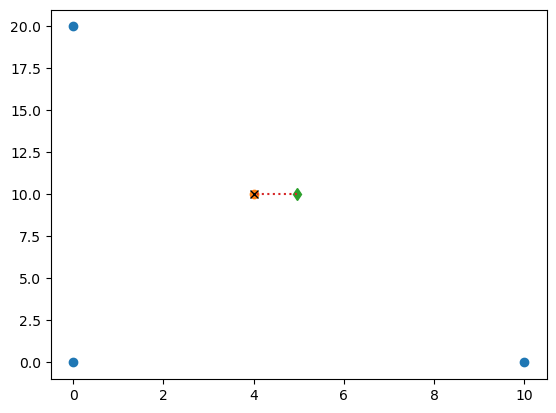

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# three hydrophones
h=np.array([[0,0,0],[10,0,0],[0,20,0]])
D=h[1:,:]-h[0,:].reshape(1,-1)
DI=np.linalg.pinv(D)

#simulasted whale location above hydrophone plane
w=np.array([4,10,2])

# whale directions from hydrophone
D=w-h
# slant ranges
R=np.sqrt(np.sum(D**2,1))

# for selecting hydrophone pairs
im1=[1,2]
im0=[0,0]
#
# simulated path differences
DR=R[im1]-R[im0]

u0,u1,az,el=direction(DI,h,im1,im0,DR)

# check with simulation
z=w-u0.T
z1=z/np.sqrt(np.sum(z**2))
azo=np.arctan2(z1[0,1],z1[0,0])*180/np.pi
print('z:',z)
print('u1:',u1.T)
print('az:',az)
print('azo:',azo)


# range estimation
# assume known z-component
u1[2]=0
u0[2]=w[2]
#
S,r0=rangeEstimation(u0,u1,h[0,:])
print('S:',S,'r0:',r0)

# to visualize direction
rr=np.arange(0,10,0.01)
vv=u0-u1*rr

if 1:
    plt.plot(h[:,0],h[:,1],'o')
    plt.plot(w[0],w[1],'o')
    plt.plot(u0[0],u0[1],'d')
    plt.plot(vv[0,:],vv[1,:],':')
    plt.plot(S[0],S[1],'kx')
    plt.show()

## Two-hydrophone localization
with two hydrophones, one can form a single pair and with $(i,j)=(1,0)$ the resulting single equation becomes

\begin{equation}
(h_1-h_0)^Ts=\frac{|h_1|^2-|h_0|^2-(\delta R_{10})^2}{2}-(\delta R_{10})R_0
\end{equation}
which cannot be solved for the source location without knowing two of the three components of the source vector. While sometimes the vertical, or z component of the source vector may be guessed an assumed, this is nearly impossible for the still missing horizontal component of the source vector. 

With only two hydrophones, localization is nearly impossible, but the direction of the soundsource may still be obtained, if the source is far away.


## Direction finding
Given

\begin{equation}
(h_i-h_j)^Ts=\frac{|h_i|^2-|h_j|^2-(\delta R_{ij})^2}{2}-(\delta R_{ij})R_j
\end{equation}

and assuming that all phones are closely spaced compared to distance to source

and noting that

\begin{equation}
(h_i-h_j)^Ts=|h_i-h_j||s|\cos{(\beta)}
\end{equation}
or equivalently with $s=|s|\hat{s}$ and dividing by $|s|$

\begin{equation}
(h_i-h_j)^T\hat{s}=|h_i-h_j|\cos{(\beta)}
\end{equation}
then

\begin{equation}
|h_i-h_j|\cos{(\beta)}=\frac{|h_i|^2-|h_j|^2-(\delta R_{ij})^2}{2|s|}-(\delta R_{ij})\frac{R_j}{|s|}
\end{equation}

Let

\begin{equation}
R_j=|s-h_j|
\end{equation}
then

\begin{equation}
|h_i-h_j|\cos{(\beta)}=\frac{|h_i|^2-|h_j|^2-(\delta R_{ij})^2}{2|s|}-(\delta R_{ij})\frac{|s-h_j|}{|s|}
\end{equation}
which for $|s| \to \infty$ becomes an equation that may be used to estimate the direction $\beta$ to a distant sound source.

\begin{equation}
(h_i-h_j)^T\hat{s}=-(\delta R_{ij})
\end{equation}
This equation is the basis for all direction finding algorithms that are based on time-delay of arrival (TDOA)

## Multi-phone direction finding
Let

\begin{equation}
(h_i-h_j)^T\hat{s}=-(\delta R_{ij})
\end{equation}

and assume an array of $n+1$ phones then one can form  $npp=(n+1)n/2$ different pairs of phones resulting to a system of $npp$ equations

\begin{equation}
\left(\begin{matrix} (x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\
                        (x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\
                        \vdots&\vdots&\vdots\\ 
                        (x_n-x_{n-1})&(y_n-y_{n-1})&(z_n-z_{n-1})
                        \end{matrix}\right)\hat{s}=-
\left(\begin{matrix} \delta R_{10}\\\delta R_{20}\\\vdots\\\delta R_{n(n-1)}
                        \end{matrix}\right)                        
\end{equation}

With

\begin{equation}
A=
\left(\begin{matrix} (x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\
                        (x_1-x_0)&(y_1-y_0)&(z_1-z_0)\\
                        \vdots&\vdots&\vdots\\ 
                        (x_n-x_{n-1})&(y_n-y_{n-1})&(z_n-z_{n-1})
                        \end{matrix}\right)                        
\end{equation}

\begin{equation}
b_1=
\left(\begin{matrix} \delta R_{10}\\\delta R_{20}\\\vdots\\\delta R_{n(n-1)}
                        \end{matrix}\right)                        
\end{equation}

the solution for the source direction vector $\hat{s}$ becomes

\begin{equation}
\hat{s}=-A^+b_1
\end{equation}

It should be noted that the path difference $\delta R_{ij}=R_i-R_j$, where $R_j$ is the path to the reference phone, is negative if the sound arrives first to phone at $h_i$ and then to the one at $h_j$, as it would for $\cos{\beta}>0$.

## Four-phone direction finding
The four phones are assumed to bo not in the same plane, i.e. they are distributed in 3D.

In [109]:
import numpy as np
import matplotlib.pyplot as plt
#
#geometry
if 1:   # pyramide
    h=np.array([[0,0,0],
                [np.cos(60/180*np.pi), np.sin(60/180*np.pi), 0],
                [np.cos(120/180*np.pi),np.sin(120/180*np.pi),0],
                [0,np.sin(60/180*np.pi)-np.tan(30/180*np.pi)/2, np.sqrt(1-(np.sin(60/180*np.pi)-np.tan(30/180*np.pi)/2)**2)]])
else:   # on cube
    h=np.array([[ 1,-1,-1],
                [-1, 1,-1],
                [-1,-1, 1],
                [ 1, 1, 1]])/(2*np.sqrt(2))

#estmate hydrophone connection vectors
im1=[1,2,3,2,3,3]
im0=[0,0,0,1,1,2]
D=h[im1,:]-h[im0,:]
L=np.sqrt(np.sum(D**2,1))
#
#print(h)
#print(L)

# invert geometry needed for direction finding
DI=np.linalg.pinv(D)


[-0.8365163  -0.22414387 -0.76180168  0.61237244  0.07471462 -0.53765781]


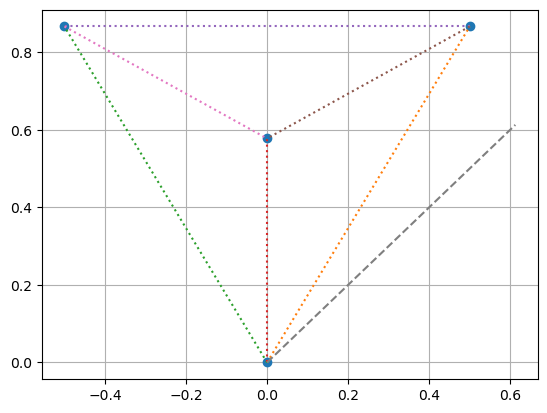

In [110]:
# simulated direction
az=45*np.pi/180
el=30*np.pi/180

S=np.array([np.cos(az)*np.cos(el),np.sin(az)*np.cos(el),np.sin(el)])

# simulate path differences
DR=-np.sum(D*S,1)
print(DR)

plt.plot(h[:,0],h[:,1],'o')
plt.plot(h[[0,1],0],h[[0,1],1],':')
plt.plot(h[[0,2],0],h[[0,2],1],':')
plt.plot(h[[0,3],0],h[[0,3],1],':')
plt.plot(h[[1,2],0],h[[1,2],1],':')
plt.plot(h[[1,3],0],h[[1,3],1],':')
plt.plot(h[[2,3],0],h[[2,3],1],':')
plt.plot([0,S[0]],[0,S[1]],'--')
plt.grid(True)
plt.show()





In [111]:
def directionFinding(DI,M):
    #direction finding
    SX=-DI@M

    # estimate and print angles
    az=np.arctan2(SX[1],SX[0])*180/np.pi
    el=np.arctan2(SX[2],np.sqrt(SX[0]**2+SX[1]**2))*180/np.pi
    return az,el
az,el=directionFinding(DI,DR)
print(az,el)


44.99999999999999 29.999999999999993


## Three-phone direction finding
all three phones in same plane, so set z-component to 0

In [112]:
import numpy as np
import matplotlib.pyplot as plt
#
#geometry
h=np.array([[0,0,0],[np.cos(60/180*np.pi),np.sin(60/180*np.pi),0],[np.cos(120/180*np.pi),np.sin(120/180*np.pi),0]])

#estmate hydrophone connection vectors
im1=[1,2,2]
im0=[0,0,1]
D=h[im1,:]-h[im0,:]

# invert geometry needed for direction finding
DI=np.linalg.pinv(D)
print(DI)


[[ 3.33333333e-01 -3.33333333e-01 -6.66666667e-01]
 [ 5.77350269e-01  5.77350269e-01  1.66533454e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


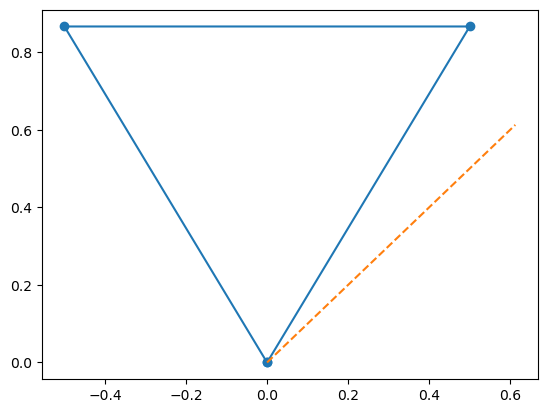

In [113]:
# simulated direction
az=45*np.pi/180
el=30*np.pi/180

S=np.array([np.cos(az)*np.cos(el),np.sin(az)*np.cos(el),np.sin(el)])

plt.plot(h[[0,1,2,0],0],h[[0,1,2,0],1],'o-')
plt.plot([0,S[0]],[0,S[1]],'--')
plt.show()

# simulate path differences (project hydrophone differences onto source direction)
DR=-np.sum(D*S,1)

In [114]:
def directionFinding(DI,M):
    #direction finding
    SX=-DI@M

    if np.linalg.matrix_rank(DI)==2:
        #extend direction vector and estimate z-component
        if len(SX)==2: SX.resize(3)
        SX[2]=np.sqrt(1-np.sum(SX**2))

    # estimate and print angles
    az=np.arctan2(SX[1],SX[0])*180/np.pi
    el=np.arctan2(SX[2],np.sqrt(SX[0]**2+SX[1]**2))*180/np.pi
    return az,el
az,el=directionFinding(DI,DR)
print(az,el)

44.99999999999999 30.00000000000003


## Beamforming

Beamforming is based on the fact that signal (here sound) arrives at different times at distributed (array of) sensors (here hydrophones).

While the direction of single sound source may be estimated by measuring the relative delays within the hydrophone array and relating these measurements to the array geometry, beamforming analyses the arriving sound field for all possible direections (beams).

### Basic formulation of single source direction finding
Let the sound direction  $\hat S$ be given by 

\begin{equation}
    \hat S = 
    \left(
        \begin{array}{c}
            S_x\\
            S_y\\
            S_z
        \end{array}
    \right)  
\end{equation}
and the hydrophone location matrix $ H $ be given by

\begin{equation}
     H = 
    \left(
        \begin{array}{c c c c}
            h_{0x} & h_{1x} & ... & h_{nx}\\
            h_{0y} & h_{1y} & ... & h_{ny}\\
            h_{0z} & h_{1z} & ... & h_{nz}\\
        \end{array}
    \right)  
\end{equation}
where the elements $(d_{ix},d_{iy},d_{iz}) $ are the $x,y,z$ components of the 3-D vector that locates the hydrophones.

Let $D_0$ be the hydrophone seperation matrix

\begin{equation}
     D_0 = H-{h_0}=
    \left(
        \begin{array}{c c c c}
            d_{1x} & d_{2x} & ... & d_{nx}\\
            d_{1y} & d_{2y} & ... & d_{ny}\\
            d_{1z} & d_{2z} & ... & d_{nz}\\
        \end{array}
    \right)  
\end{equation}

then the vector of measurements $ m$ defined by 

\begin{equation}
     m = 
    \left(
        \begin{array}{c}
            m_1\\
            m_2\\
            \vdots\\
            m_n
        \end{array}
    \right)  
\end{equation}

is estimated by the projection of the sound source direction onto the different hydrophone pairs.


\begin{equation}
     m =  D_0^T  {\hat S}
\end{equation}

The sound direction is then estimated from the measurement vector by

\begin{equation}
    {\hat S} = \left( D_0^T  D_0 \right)^{-1}  D_0  m
\end{equation}

#### Line array
In case where the array geometry is a line array then typically one assumes that $(h_{iy},h_{iz})=(0,0)$ and we get

\begin{equation}
    \hat S_x = \frac{\sum_i(d_{ix}m_i)} {\sum_i(d_{ix}^2)}
\end{equation}

### Basic formulation of beamforming
Let the sound pressure measured an a single hydrophone be composed of a signal $s$ and some noise $n$

\begin{equation}
x(t)=s(t)+n(t)
\end{equation}

then in an array of hydrophones the measurements become

\begin{equation}
x_i(t)=s(t-\tau_i(\alpha,\beta))+n(t)
\end{equation}
where $\tau_i(\alpha,\beta)$ is the delay of the signal at hydrophone $i$ with respect to some reference hydrophone and $\alpha,\beta$ are the angles of arrival

For a line array with equally spaced hydrophones the delay has a simple form

\begin{equation}
\tau_i(t)=i\frac{d}{c}\cos{\gamma}
\end{equation}
where $d$ id the hydrophone spacing, $c$ is the sound speed at the hydrophone, and $\gamma$ is the relative angle of arrival, that for a line array is composed of the azimuth $\alpha$ and elevation angle $\beta$.

\begin{equation}
\cos{\gamma}=\cos{\alpha}\cos{\beta}
\end{equation}

The beamforming algorithm simply speaking tries to undo the signal delays $\tau_i(\alpha,\beta)$ by compensating with negative delays 

\begin{equation}
x(t)=\frac{1}{N}\sum_i (x_t(+\delta_i(\gamma)))
\end{equation}

In cases, where $\delta_i(\gamma)=\tau_i(\alpha,\beta)$ we get 

\begin{equation}
x(t)=s(t)+\frac{1}{N}\sum_i(n(t+\delta_i(\gamma)))
\end{equation}
indicating that the signal $s(t)$ is completely reconstructed and that noise, that is assumed to be uncorrelated is attenuated.

In all other cases also the signal is attenuated die to delay mismatch.


### Simulation
In the following we simulate the beamforing with a line array of Zc clicks

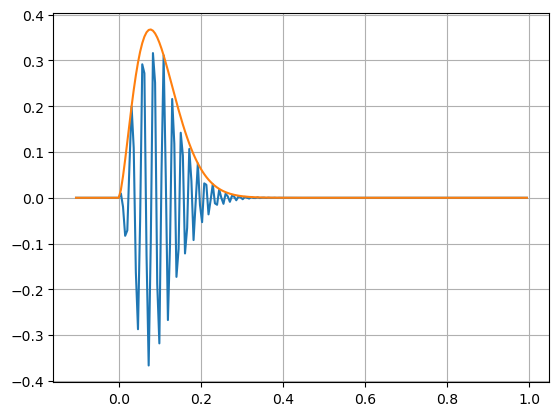

In [115]:
## Simulation of Zc clicks
import numpy as np
import matplotlib.pyplot as plt

def zcSig(tt,f0,fm,aa,bb,cc):
    return (aa*tt)**bb * np.exp(-(aa*tt)**cc + 2*np.pi*1j*(f0+fm*tt)*tt)

fs=192 #kHz
ts=1 #ms
tt=np.arange(0,ts,1/fs)

f0=30
fm=60
aa=13
bb=1.5
cc=1.5
ss=zcSig(tt,f0,fm,aa,bb,cc)
ss=np.append(np.zeros((20,1)),ss)
tt=(-20+np.arange(len(ss)))/fs
#tt=np.arange(-20/fs,ts,1/fs)

plt.plot(tt,np.real(ss));
plt.plot(tt,np.abs(ss));
plt.grid(True)
plt.show()

In [116]:
# Line array
c=1500      # m/s sound speed
d=0.0125    # hydrophone spacing (0.75/60)
N=10        # number of hydrophones
print('d:',d)
h=np.arange(N)*d

d: 0.0125


In [117]:
#
# Overlap-add FIR filter, (c) Joachim Thiemann 2016
# https://github.com/jthiem/overlapadd/blob/master/olafilt.py
#
def fftfilt(b, x, zi=None):
    """
    Filter a one-dimensional array with an FIR filter

    Filter a data sequence, `x`, using a FIR filter given in `b`.
    Filtering uses the overlap-add method converting both `x` and `b`
    into frequency domain first.  The FFT size is determined as the
    next higher power of 2 of twice the length of `b`.

    Parameters
    ----------
    b : one-dimensional numpy array
        The impulse response of the filter
    x : one-dimensional numpy array
        Signal to be filtered
    zi : one-dimensional numpy array, optional
        Initial condition of the filter, but in reality just the
        runout of the previous computation.  If `zi` is None or not
        given, then zero initial state is assumed.

    Returns
    -------
    y : array
        The output of the digital filter.
    zf : array, optional
        If `zi` is None, this is not returned, otherwise, `zf` holds the
        final filter delay values.
    """

    L_I = b.shape[0]
    # Find power of 2 larger that 2*L_I (from abarnert on Stackoverflow)
    L_F = 2<<(L_I-1).bit_length()
    L_S = L_F - L_I + 1
    L_sig = x.shape[0]
    offsets = range(0, L_sig, L_S)

    # handle complex or real input
    if np.iscomplexobj(b) or np.iscomplexobj(x):
        fft_func = np.fft.fft
        ifft_func = np.fft.ifft
        res = np.zeros(L_sig+L_F, dtype=np.complex128)
    else:
        fft_func = np.fft.rfft
        ifft_func = np.fft.irfft
        res = np.zeros(L_sig+L_F)

    FDir = fft_func(b, n=L_F)

    # overlap and add
    for n in offsets:
        res[n:n+L_F] += ifft_func(fft_func(x[n:n+L_S], n=L_F)*FDir)

    if zi is not None:
        res[:zi.shape[0]] = res[:zi.shape[0]] + zi
        return res[:L_sig], res[L_sig:]
    else:
        return res[:L_sig]
    

### Simulate measurements
- estimate the arrival times (up to a constant) for all hydrophones
- delay time series using a fractional sinc function

A sinc function is used as it is an all-pass filter with well defined delay proprty. Other interpolating low-pass filter may be used (e.g. Kaiser filters). The filters should be of FIR type to have well defined delay properties.

Here, to simplify the algorithm, no integer resampling is done, requiring somewhat more coefficients to minimize edge effects.

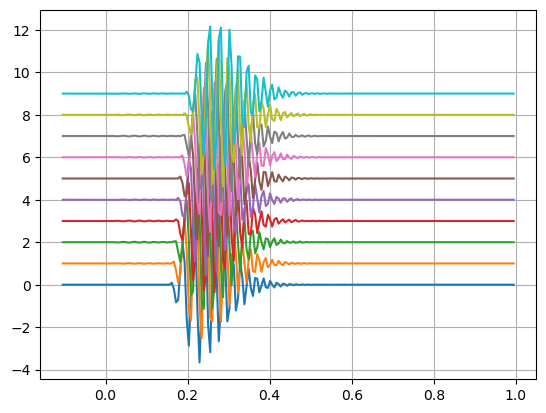

In [118]:
# measurements
import scipy.signal as signal

fs=192000
#
if 0:
    # noise
    noise_power = 0.001 * fs / 2 
    ndat=fs//100
    M=np.random.normal(scale=np.sqrt(noise_power), size=(N,ndat))

    # estimate power spectral density (PSD)
    win=signal.get_window("hann",1024)
    f, Pxx_dens = signal.welch(M[0,:], fs=fs, nperseg=len(win), noverlap=0, scaling="density", window=win)

    plt.semilogy(f/1000, Pxx_dens)
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('PSD [V**2/Hz]')
    plt.ylim(1e-6,1e-1)
    plt.grid(True)

    plt.show()

# signal
iao=60  # simulated angle

xo=ss.real
# simulated delays relative to hydrophone 0
tau=np.arange(N)*d/c*np.cos(iao*np.pi/180)

yy=np.zeros((len(xo),N))

kk=np.arange(-30,30,1);
for ii in range(N):
    uu=np.sinc(kk-tau[ii]*fs)
    yy[:,ii]=fftfilt(uu,xo)

plt.plot(tt,yy*10+np.ones((yy.shape[0],1))*range(N))
plt.grid(True)
plt.show()


### check steering
To check method compensate simulated delay so that all hydrophone receive in parallel

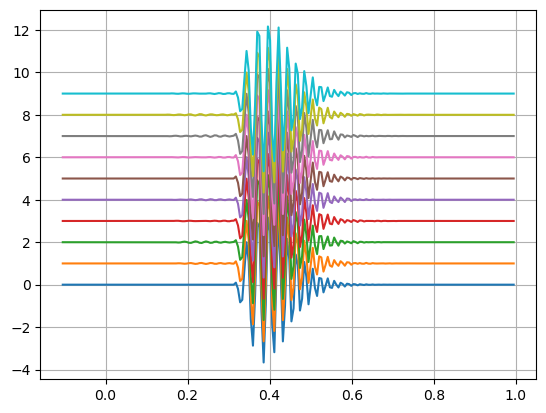

In [119]:
# check steering (replace sinc(kk-tau[ii]*fs) by sinc(kk+tau[ii]*fs))
vv=np.zeros((len(ss),N))
for ii in range(N):
    uu=np.sinc(kk+tau[ii]*fs)
    vv[:,ii]=fftfilt(uu,yy[:,ii])
plt.plot(tt,vv*10+np.ones((vv.shape[0],1))*range(N))
plt.grid(True)
plt.show()


### Spatial filtering (beamformer)
 - Create first the filter coefficient matrix
 - filter all hydrophone using the adequate coefficients.
 - for each time step average all hydrophones

 inspection of the coefficients indicate that for the 0 and 180 deg cases edge effects may occur at the end of the array.

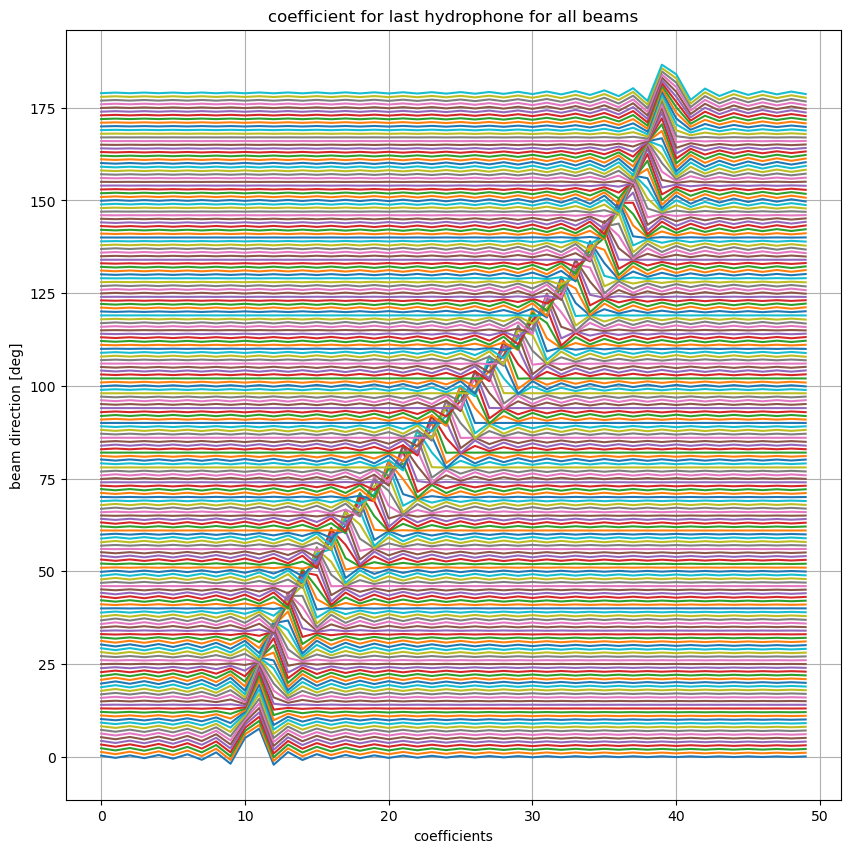

In [120]:
# beamformer

def delayMatrix(dd,maxDel):
    # generate delay coefficient matrix
    nc=np.ceil(maxDel)+10  # assume nimimum sinc coefficients: -10:10
    kk=np.arange(-nc,nc)
    #
    ww = np.zeros((len(kk),dd.shape[0],dd.shape[1]))
    for cc in range(ndir):              # over all beams
        for ii in range(N):             # over all hydrophones
            arg=kk+dd[ii,cc]
            ww[:,ii,cc]=np.sinc(arg)
    return ww


ndir=180
dd=h.reshape(-1,1)/c*np.cos(np.arange(ndir)/ndir*np.pi)*fs
maxDel=h[-1]/c*fs
ww=delayMatrix(dd,maxDel)

plt.figure(figsize=(10,10))
plt.title('coefficient for last hydrophone for all beams')
plt.plot(ww[:,-1,:]*10+np.ones((ww.shape[0],1))*range(ndir))
plt.xlabel('coefficients')
plt.ylabel('beam direction [deg]')
plt.grid(True)
plt.show()


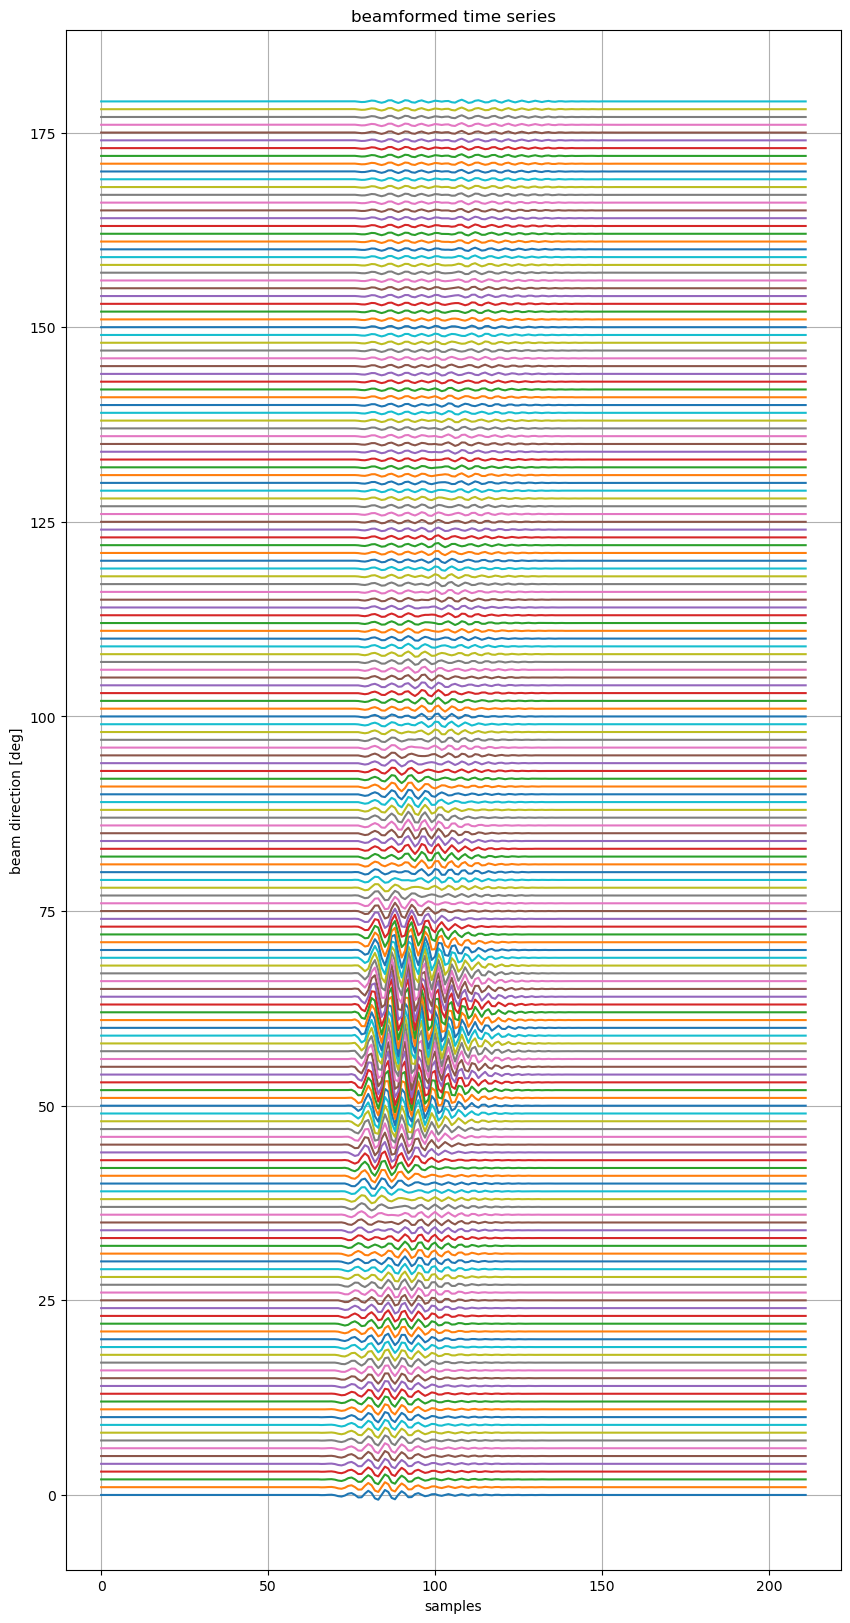

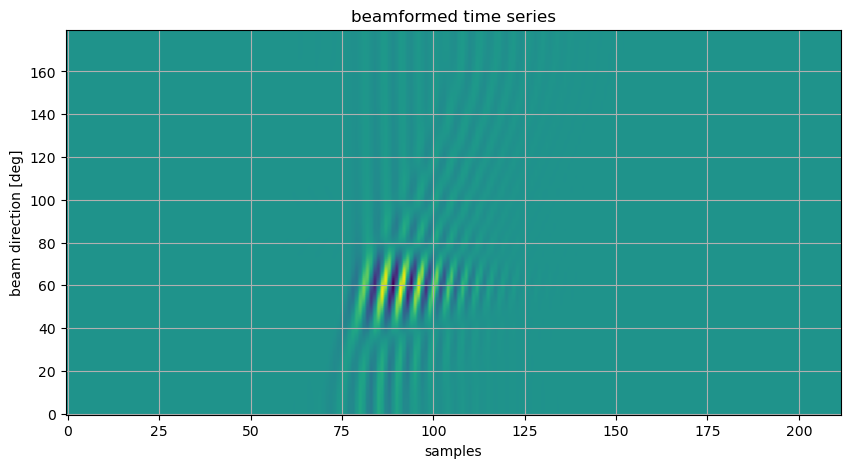

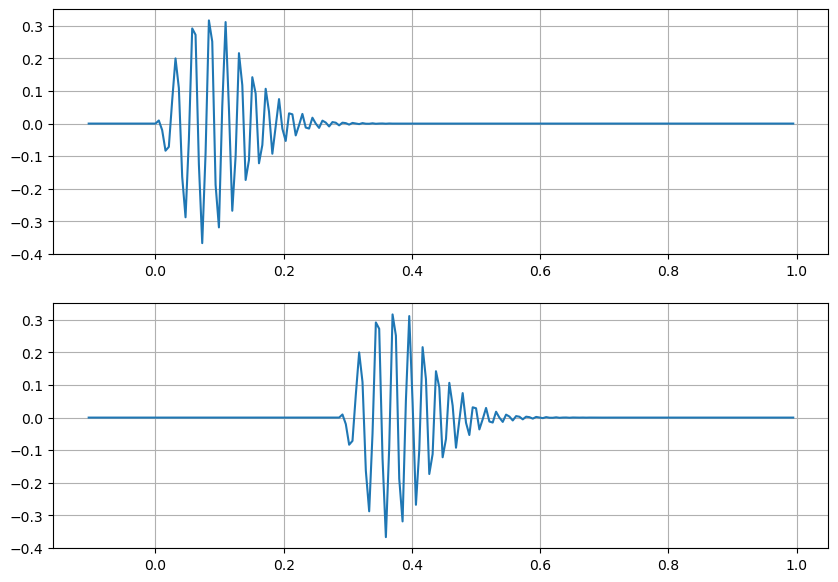

In [121]:
# filter data (beamformer)
def beamform(ww,yy):
    vv=np.zeros(yy.shape)
    zz=np.zeros((yy.shape[0],ww.shape[2]))
    for cc in range(ndir):              # over all beams
        for ii in range(N):             # over all hydrophones
            vv[:,ii]=fftfilt(ww[:,ii,cc],yy[:,ii])
        zz[:,cc]=np.mean(vv,axis=1)     # sum hydrophones for each beam
    return zz
#
zz=beamform(ww,yy)
plt.figure(figsize=(10,20))
plt.title('beamformed time series')
plt.plot(zz*10+np.ones((zz.shape[0],1))*range(ndir))
plt.xlabel('samples')
plt.ylabel('beam direction [deg]')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.title('beamformed time series')
plt.imshow(zz.T,aspect='auto',origin='lower')
plt.xlabel('samples')
plt.ylabel('beam direction [deg]')
plt.grid(True)
plt.show()
#
# compare with input signal

plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(tt,ss.real)
plt.grid(True)
plt.subplot(212)
plt.plot(tt,zz[:,iao])
plt.grid(True)
plt.show()
